**Описание проекта**

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br><br>
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br><br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы копий)

**EU_sales** — продажи в Европе (миллионы копий)

**JP_sales** — продажи в Японии (миллионы копий)

**Other_sales** — продажи в других странах (миллионы копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
Данные за 2016 год могут быть неполными.

**Шаг 1. Изучение общей информации.**

Откроем файл с данными и изучим общую информацию. Для этого вначале импортируем все необходимые для дальнейшей работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
# Посмотрим на первые 10 строк нашего датасета.
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Выведем общую информацию.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Названия колонок не приведены к нижнему регистру! Исправим это во время подготовки данных.**

Посчитаем пропуски:

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Как видно выше, мы имеем пропуски в следующих столбцах:
* **Name** - 2 пропуска;
* **Year_of_Release** - 269 пропусков;
* **Genre** - 2 пропуска;
* **Critic_Score** - 8578 пропусков;
* **User_Score** - 6701 пропуск;
* **Rating** - 6766 пропусков.

Посмотрим на строки с пропущенными значениями в столбцах **Name**, **Genre**.

In [6]:
data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно выше, пропуски в этих столбцах встречаются в одинаковых строках. Удалим их далее.

Теперь посмотрим на первые 10 строк с пропущенными значениями в столбце **Year_of_Release**.

In [7]:
data[data['Year_of_Release'].isna()].head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Если данные игры выходили на нескольких платформах, то пропуски можно будет заменить, зная сведения о выходе игры на платформе, где был указан год выхода. Окончательное решение примем позднее.

Как устранить пропуски в оставшихся столбцах  **Critic_Score**, **User_Score** и **Rating**, также решим позднее.

Посмотрим, какие уникальные значения имеются в следующих столбцах: **Platform**, **Year_of_Release**, 
**Genre**, **Critic_Score**, **User_Score** и **Rating**.

In [8]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [12]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Как видно выше, практически все уникальные значения не вызывают вопросов. 

Интересно только наличие аббревиатуры "tbd" в столбце **User_Score**.

Если верить сведениям из поисковика: *TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.* 

Собственно, что делать с этим значением решим на этапе подготовки данных.

И напоследок проверим на наличие дубликатов.

In [14]:
data.duplicated().sum()

0

Явных дубликатов нет.

**Выводы по шагу 1**.

* Названия всех колонок **Name**, **Platform**, **Year_of_Release**, **Genre**,	**NA_sales**, **EU_sales**, **JP_sales**, **Other_sales**, **Critic_Score**, **User_Score**, **Rating** нужно будет привести к нижнему регистру;

* Имеются пропуски в столбцах **Name**, **Year_of_Release**, **Genre**, **Critic_Score**, **User_Score**, **Rating**. Что с ними делать окончательно решим на следующем шаге;

* Аномальных или странных значений не выявлено. Только в столбце **User_Score** нужно будет заменить значение "tbd".

* Дубликаты отсутствуют.

* В следующих столбцах можно изменить типы данных: **Year_of_Release** привести к "int", а **User_Score** после замены "tbd" привести к "float".

**Шаг 2. Подготовка данных.**

Начнем с приведения названий колонок к нижнему регистру:

In [15]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Как видно выше, теперь все колонки в нижнем регистре. 

Удаляем строки с пропусками в столбце "name" (пропуски в столбце "genre" в тех же строках).

In [16]:
data = data.dropna(subset=['name'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Теперь займемся столбцом **user_score**. Как было сказано в шаге 1, аббревиатура "tbd" используется, когда значение еще не определено. Поэтому логичнее всего "tbd" заменить на "NaN". Тогда мы сможем привести столбец **user_score** к типу "float".

In [18]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Избавились от "tbd".

Теперь можно перейти к смене типов данных в столбцах, где это возможно (**Year_of_Release** привести к "int", а **User_Score** после замены "tbd" привести к "float").

In [19]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Поясню, по какой причине были изменены типы данных. В столбце **year_of_release** указаны годы выпуска игры. Год выпуска - целое число, поэтому переход из вещественного типа оправдан. В случае столбца **user_score** изначально был строковый тип данных из-за наличия значения "tbd" в столбце. Но после его замены на "NaN", стало возможным приведение столбца к вещественному типу (целый тип не подходит, поскольку оценка выставляется с шагом 0.1). 

Теперь можно перейти к устранению пропусков. 

Начнем со столбца **year_of_release**.

Удалим все пропуски в этом столбце.

In [21]:
# Еще раз проверим, сколько пропусков в столбце "year_of_release"
data['year_of_release'].isna().sum()

269

In [22]:
data = data.dropna(subset=['year_of_release'])

In [23]:
# Проверим, сколько осталось пропусков в столбце "year_of_release"
data['year_of_release'].isna().sum()

0

In [24]:
data = data.reset_index(drop=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь попробуем избавиться от пропусков в оставшихся трех столбцах: **critic_score**, **user_score**, **rating**.

In [25]:
# Еще раз проверим, сколько пропусков в этих столбцах
print(data['critic_score'].isna().sum())
print(data['user_score'].isna().sum())
print(data['rating'].isna().sum())

8461
8981
6676


In [26]:
for i in data[data['critic_score'].isnull() == True].index:
    data['critic_score'][i] = data.loc[data['name'] == data['name'][i], 'critic_score'].max()

/tmp/ipykernel_314/3149985596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['critic_score'][i] = data.loc[data['name'] == data['name'][i], 'critic_score'].max()


In [27]:
for i in data[data['user_score'].isnull() == True].index:
    data['user_score'][i] = data.loc[data['name'] == data['name'][i], 'user_score'].max()

/tmp/ipykernel_314/2346949226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'][i] = data.loc[data['name'] == data['name'][i], 'user_score'].max()


In [28]:
data['rating'] = data['rating'].fillna('no_rating')

In [29]:
# Проверим, сколько пропусков осталось в этих столбцах
print(data['critic_score'].isna().sum())
print(data['user_score'].isna().sum())
print(data['rating'].isna().sum())

7522
7920
0


Удалось избавиться от небольшого количества пропусков (примерно по 1000 для столбцов "critic_score" и "user_score"). 

Больше с этим датасетом сделать ничего не получится, чтобы избавиться от пропусков и при этом сильно не исказить данные для дальнейшего анализа.

Пропуски, по моему мнению, здесь в основном вызваны тем, что индекс ESRB применяется только в США и Канаде. Соответственно, если игры выпускали не в этих странах, то они могли и не получить этот рейтинг. 

Согласно заданию проекта, нам также нужно добавить новый столбец с суммарными продажами во всех регионах.

In [30]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


**Выводы по шагу 2:**

В ходе подготовки данных к исследованию были выполнены следующие действия:

* Названия столбцов приведены к нижнему регистру;
* Преобразованы типы данных в двух столбцах;
* Обработаны пропуски, и где это было возможно, заменены значениями;
* Добавлен столбец с данными о суммарных продажах.


**Шаг 3. Исследовательский анализ данных.**

**3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

Сгруппируем информацию по годам выхода игр:

In [31]:
data_year = data.groupby('year_of_release')['sum_sales'].count()
data_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: sum_sales, dtype: int64

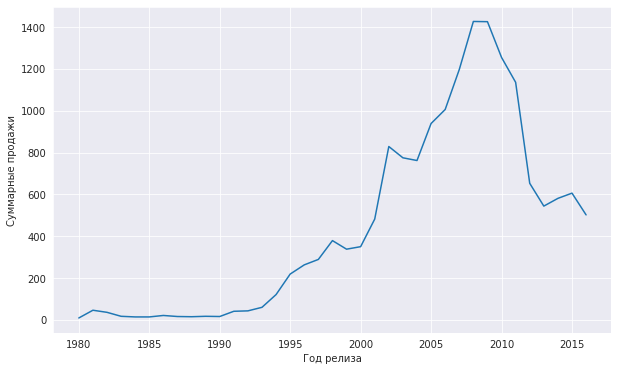

In [32]:
data_year.plot(xlabel='Год релиза', ylabel='Суммарные продажи', grid = True, figsize = (10,6))
plt.show()

Как видно выше, в период до 1995 года выпускалось менее 200 игр в год. Пиковое значение - 1440 игр за 2008 год. 
Для прогноза продаж на 2017 год разумно рассматривать период с 2014 по 2016 годы включительно, поскольку рынок компьютерных игр очень изменчив и быстро развивается, а также продажи в этот период примерно одинаковые.

**3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы.**
**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [33]:
data_sales = data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by='sum_sales', ascending=False)
data_sales

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


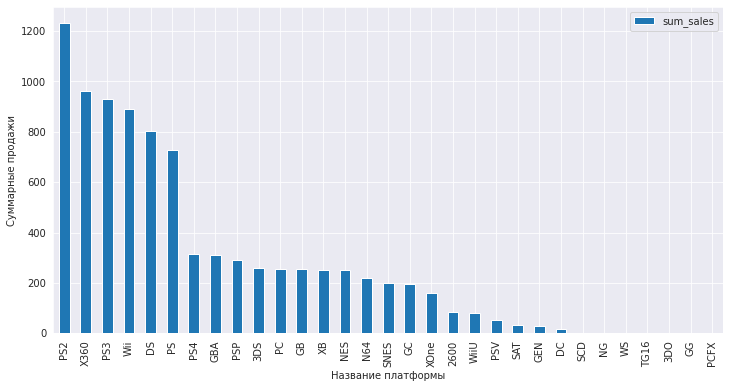

In [34]:
data_sales.plot(xlabel = 'Название платформы', ylabel='Суммарные продажи', kind='bar', figsize=(12,6))
plt.show()

В топ-10 платформ за весь период с 1980 по 2016 годы вошли: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC. 

In [35]:
# Напишем функцию, которая будет возвращать сводную таблицу по нужным платформам
def top_platform(name, data):
    name_of_platform = data[(data['platform'] == name) & (data['year_of_release'] >= 1993)]
    total = name_of_platform.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [36]:
# Отдельно создадим таблицу для топ-10 платформ по продажам
top_10_platforms = data_sales.head(10).reset_index().rename_axis(None, axis=1)
top_10_platforms

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


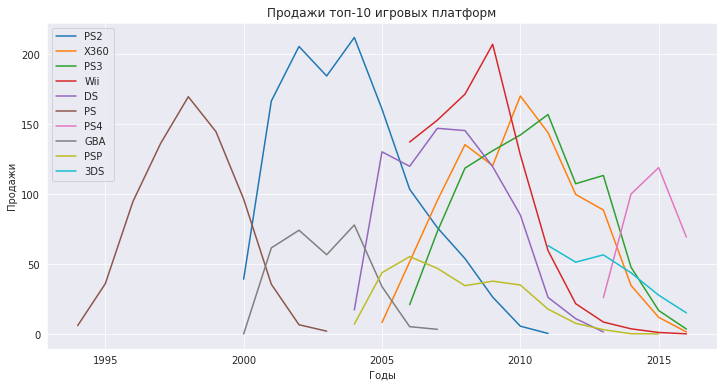

In [37]:
# Визуализируем информацию по топ-10 платформам
plt.figure(figsize=(12,6))
plt.title('Продажи топ-10 игровых платформ')
plt.xlabel('Годы')
plt.ylabel('Продажи')

for i in list(top_10_platforms['platform']):
    sns.lineplot(data=top_platform(i,data)['sum_sales'], label=i)
    plt.legend()

Как видно по графикам, для всех популярных платформ характерно то, что они "существуют" в среднем 10 лет (кроме PC - персональных компьютеров). Своих пиковых продаж (за исключением Wii, PC и PS4) игры для них достигают примерно через 5 лет после выхода платформы на рынок. Согласно данному рисунку наибольший потенциал на конец 2016 года имеет PS4, что не удивительно, поскольку это самая молодая платформа в топ-10. Игры для PC сильно уступают по популярности PS4, но персональные компьютеры имеет большое число потенциальных покупателей, так что эта платформа тоже потенциально прибыльна. Популярность X360 и PS3 сильно упала к концу 2016 года вследствие роста популярности PS4, поэтому продажи для этих платформ уже менее выгодны. Также интересен случай Wii - консоль появилась в 2006 году и сразу стала очень популярной, но уже начиная с 2009 года, продажи игр на нее очень резко начали снижаться, и к концу 2016 года достигли практически нуля.

Таким образом, наибольшим потенциалом обладают игры для PS4. Игры для PC тоже "привлекательны" поскольку могут приносить постоянную прибыль, пусть и небольшую.

Далее будет рассматриваться период с 2014 по 2016 годы.

In [38]:
data_sales_2014_2016 = data[data['year_of_release']>=2014].pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by='sum_sales', ascending=False)
data_sales_2014_2016

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


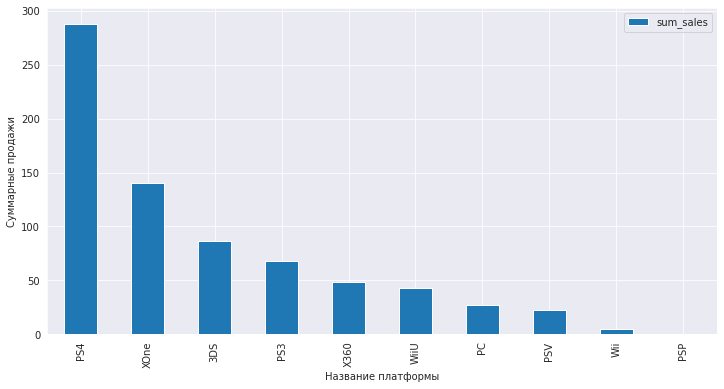

In [39]:
data_sales_2014_2016.plot(xlabel = 'Название платформы', ylabel='Суммарные продажи', kind='bar', figsize=(12,6))
plt.show()

Как видно выше, за последние 3 года продавались игры только к 10 указанным платформам.

In [40]:
# Напишем функцию, которая будет возвращать сводную таблицу по платформам
def platform_2014_2016(name, data):
    name_of_platform = data[(data['platform'] == name) & (data['year_of_release'] >= 2014)]
    total = name_of_platform.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [41]:
# Отдельно создадим таблицу
platforms_2014_2016 = data_sales_2014_2016.reset_index().rename_axis(None, axis=1)
platforms_2014_2016

,platform,sum_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


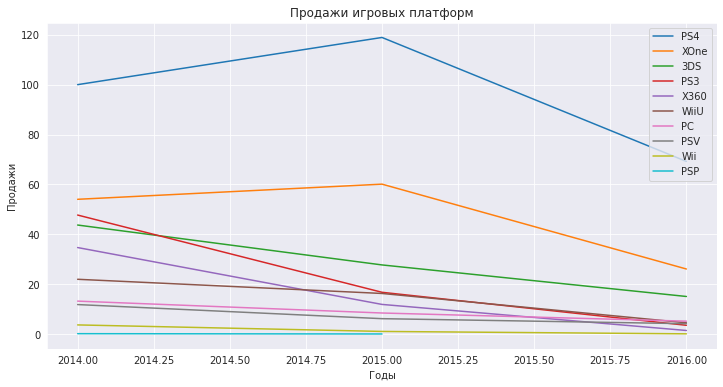

In [42]:
# Визуализируем информацию
plt.figure(figsize=(12,6))
plt.title('Продажи игровых платформ')
plt.xlabel('Годы')
plt.ylabel('Продажи')

for i in list(platforms_2014_2016['platform']):
    sns.lineplot(data=platform_2014_2016(i,data)['sum_sales'], label=i)
    plt.legend()

При рассмотрении актуального периода можно увидеть, что помимо PS4 высокий уровень продаж имеют также игры для XOne и 3DS. Поскольку мы не имеем полной информации за 2016 год, поэтому нельзя с уверенностью сказать (можем только предположить), что продажи для платформ PS4 и XOne вырастут по сравнению с 2015 годом. Что касается игр для остальных платформ, то у них заметен тренд на снижение продаж. В дальнейшем будем рассматривать топ-8 платформ (PS4, XOne, 3DS, PS3, X360, WiiU, PC, PSV) по продажам, поскольку уровень продаж для Wii и PSP слишком мал по сравнению с остальными платформами.

**3.3 Постройте график "ящик с усами" по глобальным продажам игр в разбивке по платформам.**

Для нашего топ-8 построим "ящики с усами".

Создадим новый датафрейм, в котором будет информация только за последние 3 года (2014-2016).

In [43]:
data_actual = data[data['year_of_release']>=2014]
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


In [44]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     987 non-null    float64
 9   user_score       1020 non-null   float64
 10  rating           1689 non-null   object 
 11  sum_sales        1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


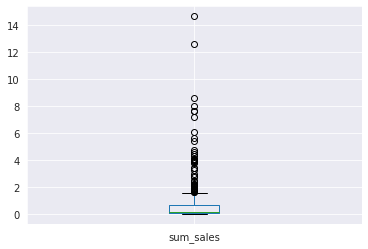

In [45]:
data_actual[(data_actual['platform']=='PS4')].boxplot(column='sum_sales')
plt.show()

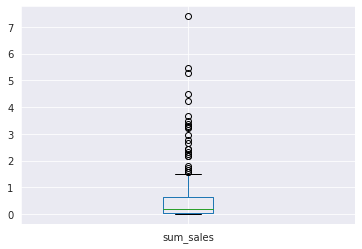

In [46]:
data_actual[data_actual['platform']=='XOne'].boxplot(column='sum_sales')
plt.show()

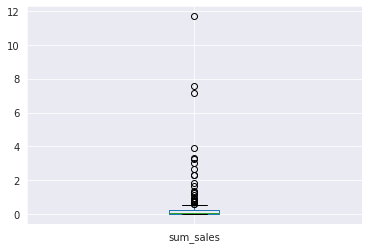

In [47]:
data_actual[data_actual['platform']=='3DS'].boxplot(column='sum_sales')
plt.show()

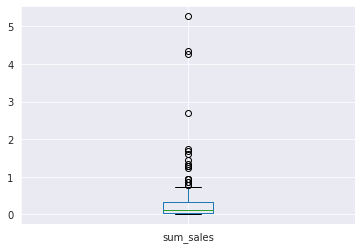

In [48]:
data_actual[data_actual['platform']=='PS3'].boxplot(column='sum_sales')
plt.show()

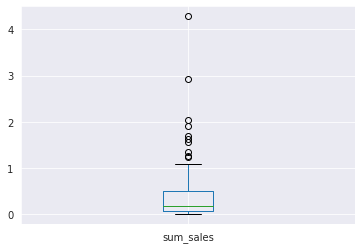

In [49]:
data_actual[data_actual['platform']=='X360'].boxplot(column='sum_sales')
plt.show()

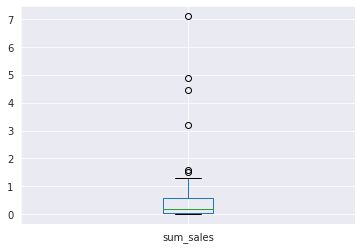

In [50]:
data_actual[data_actual['platform']=='WiiU'].boxplot(column='sum_sales')
plt.show()

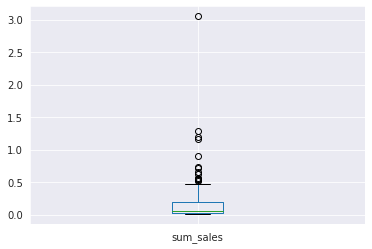

In [51]:
data_actual[data_actual['platform']=='PC'].boxplot(column='sum_sales')
plt.show()

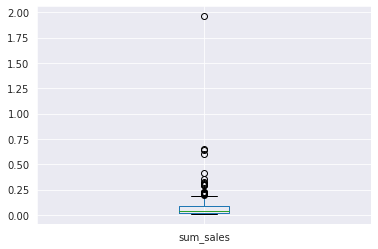

In [52]:
data_actual[data_actual['platform']=='PSV'].boxplot(column='sum_sales')
plt.show()

В таком виде очень сложно интерпретировать результаты, приведенные на данных рисунках. Для большей наглядности можно все "ящики с усами" отобразить на одном рисунке. 

Теперь можем привести нужные нам графики на рисунке.

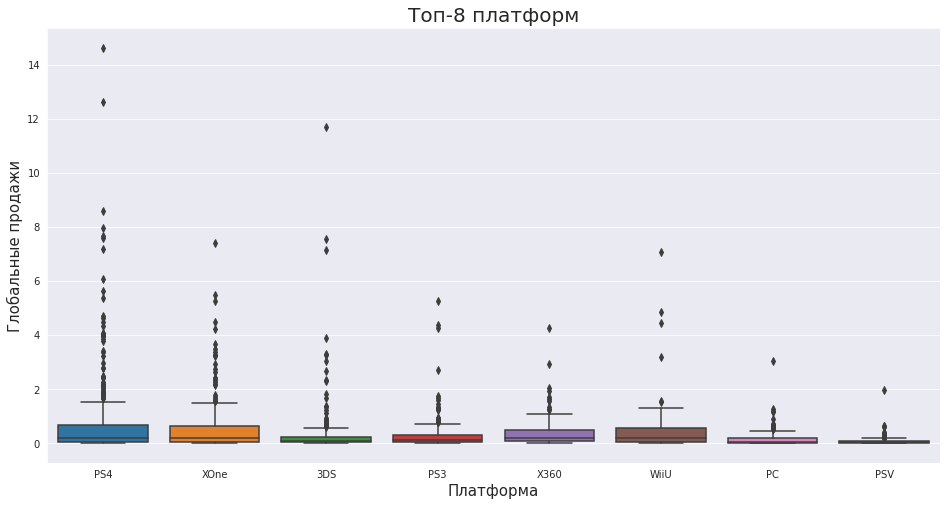

In [53]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data_actual, x='platform', y='sum_sales', order=['PS4','XOne','3DS','PS3','X360','WiiU','PC','PSV'])
plt.title('Топ-8 платформ', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15)
plt.show()

В таком масштабе ничего не видно, поэтому масштабируем рисунок.

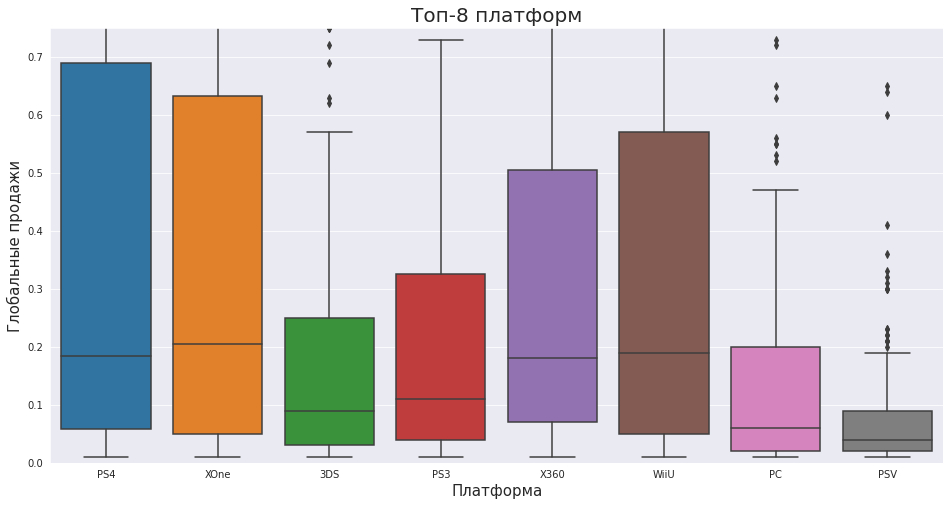

In [54]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data_actual, x='platform', y='sum_sales', order=['PS4','XOne','3DS','PS3','X360','WiiU','PC','PSV'])
plt.title('Топ-8 платформ', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15)
plt.ylim(0,0.75)
plt.show()

Как видно по обобщенному графику, больше всего продаж в топ-8 приходится на PS4, а меньше всего на PSV. PS4 немного уступают XOne и WiiU. Медианные продажи для первой тройки примерно одинаковы (для X360 медиана тоже очень близка к лидерам), но при этом для XOne они оказались выше, чем для PS4. Оставшиеся платформы (3DS, PS3, PC и PSV) заметно уступают первой тройке плюс X360.

**3.4 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.**

Проведем анализ для наших топ-8 платформ.

In [55]:
ps_4 = data_actual[data_actual['platform']=='PS4']
ps_4['critic_score'].corr(ps_4['sum_sales'])

0.3847614454388504

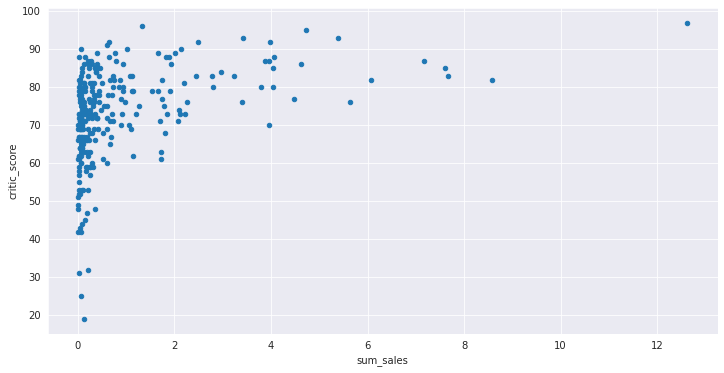

In [56]:
ps_4.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(12,6))
plt.show()

In [57]:
ps_4['user_score'].corr(ps_4['sum_sales'])

-0.028521623863803462

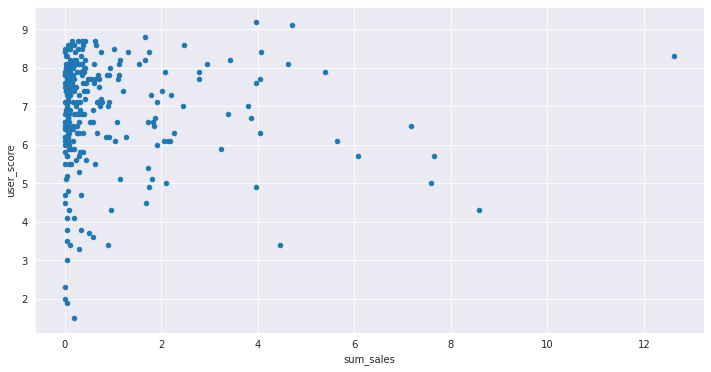

In [58]:
ps_4.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(12,6))
plt.show()

Как видно по коэффициентам корреляции, оценки критиков немного коррелируют (коэффициент корреляции Пирсона равен 0,385) с общими продажами игр для PS4, а вот оценки игроков практически не коррелируют (коэффициент равен -0,029).

Проведем проверку для оставшихся платформ из топ-8.

In [59]:
x_one = data_actual[data_actual['platform']=='XOne']
print('Корреляция продаж с оценками критиков для XOne равна', x_one['critic_score'].corr(x_one['sum_sales']))
print('Корреляция продаж с оценками пользователей для XOne равна', x_one['user_score'].corr(x_one['sum_sales']))

Корреляция продаж с оценками критиков для XOne равна 0.37045535660817785
Корреляция продаж с оценками пользователей для XOne равна -0.10090631419045017


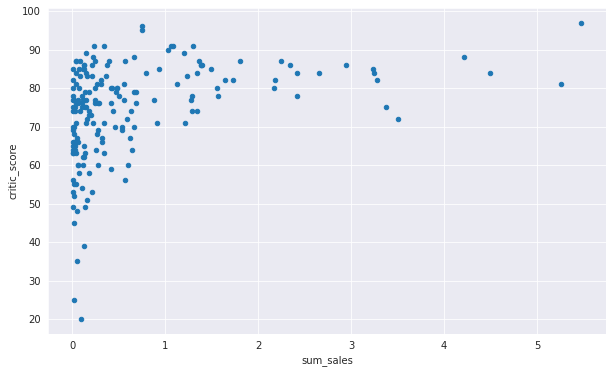

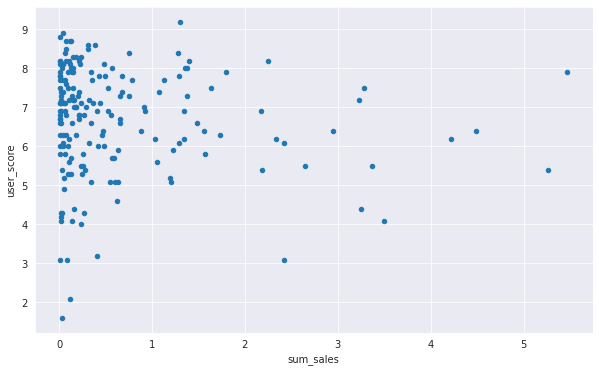

In [60]:
x_one.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(10,6))
plt.show()
x_one.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(10,6))
plt.show()

In [61]:
ds_3 = data_actual[data_actual['platform']=='3DS']
print('Корреляция продаж с оценками критиков для 3DS равна', ds_3['critic_score'].corr(ds_3['sum_sales']))
print('Корреляция продаж с оценками пользователей для 3DS равна', ds_3['user_score'].corr(ds_3['sum_sales']))

Корреляция продаж с оценками критиков для 3DS равна 0.27279978355588136
Корреляция продаж с оценками пользователей для 3DS равна 0.2325574321683208


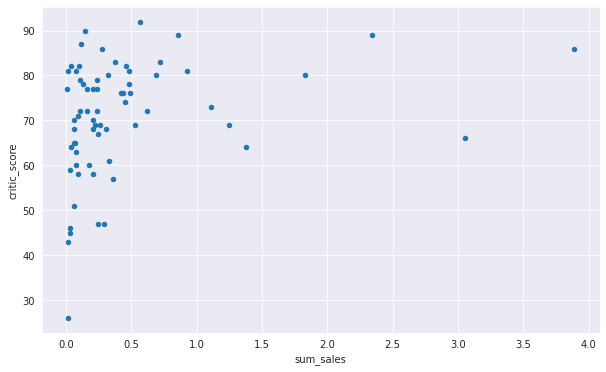

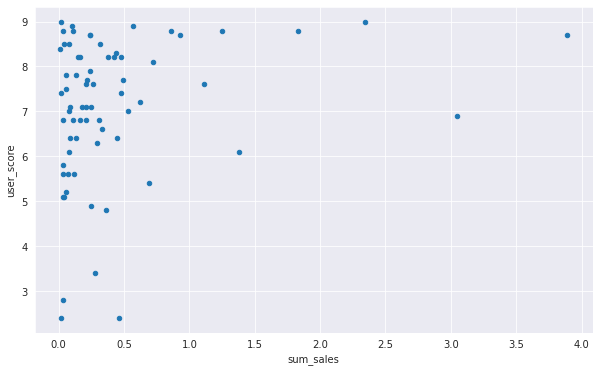

In [62]:
ds_3.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(10,6))
plt.show()
ds_3.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(10,6))
plt.show()

In [63]:
ps_3 = data_actual[data_actual['platform']=='PS3']
print('Корреляция продаж с оценками критиков для PS3 равна', ps_3['critic_score'].corr(ps_3['sum_sales']))
print('Корреляция продаж с оценками пользователей для PS3 равна', ps_3['user_score'].corr(ps_3['sum_sales']))

Корреляция продаж с оценками критиков для PS3 равна 0.3201597565547589
Корреляция продаж с оценками пользователей для PS3 равна -0.16830790743741528


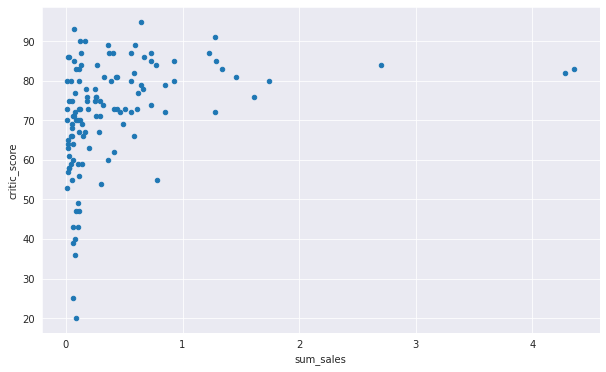

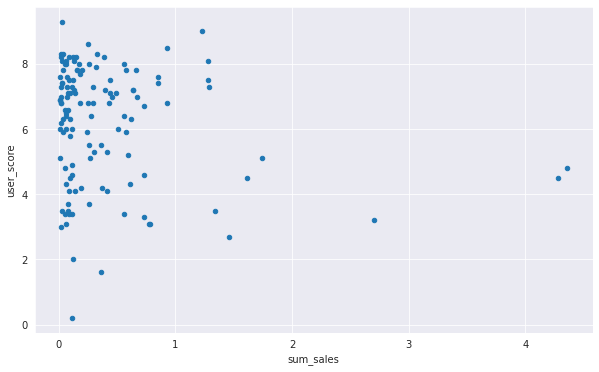

In [64]:
ps_3.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(10,6))
plt.show()
ps_3.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(10,6))
plt.show()

In [65]:
x_360 = data_actual[data_actual['platform']=='X360']
print('Корреляция продаж с оценками критиков для X360 равна', x_360['critic_score'].corr(x_360['sum_sales']))
print('Корреляция продаж с оценками пользователей для X360 равна', x_360['user_score'].corr(x_360['sum_sales']))

Корреляция продаж с оценками критиков для X360 равна 0.32832252109802
Корреляция продаж с оценками пользователей для X360 равна -0.14070231049165924


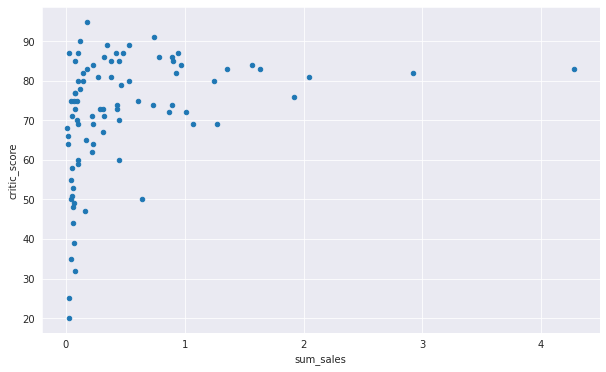

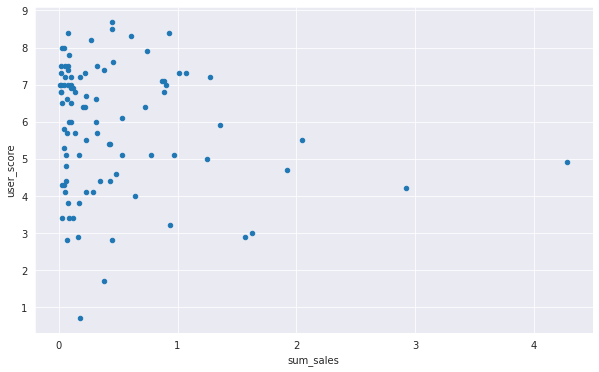

In [66]:
x_360.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(10,6))
plt.show()
x_360.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(10,6))
plt.show()

In [67]:
wii_u = data_actual[data_actual['platform']=='WiiU']
print('Корреляция продаж с оценками критиков для WiiU равна', wii_u['critic_score'].corr(wii_u['sum_sales']))
print('Корреляция продаж с оценками пользователей для WiiU равна', wii_u['user_score'].corr(wii_u['sum_sales']))

Корреляция продаж с оценками критиков для WiiU равна 0.36123270082077696
Корреляция продаж с оценками пользователей для WiiU равна 0.379221307225489


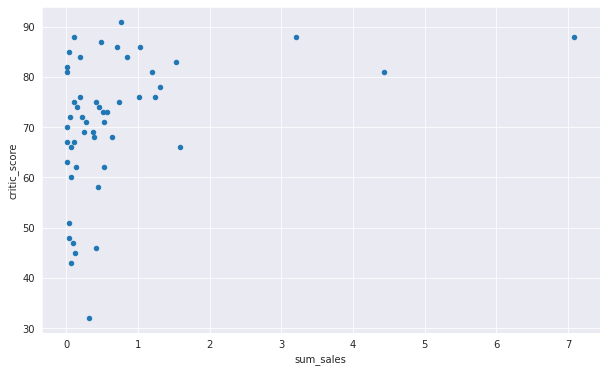

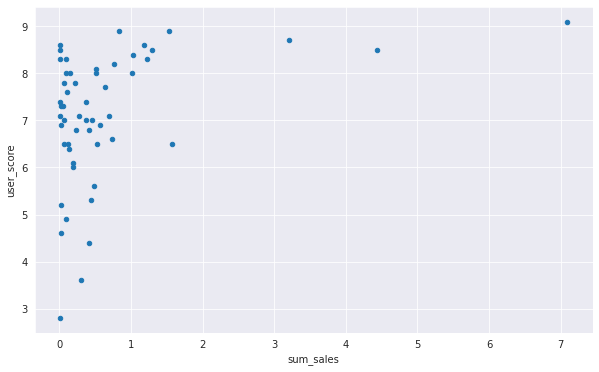

In [68]:
wii_u.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(10,6))
plt.show()
wii_u.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(10,6))
plt.show()

In [69]:
pc = data_actual[data_actual['platform']=='PC']
print('Корреляция продаж с оценками критиков для PC равна', pc['critic_score'].corr(pc['sum_sales']))
print('Корреляция продаж с оценками пользователей для PC равна', pc['user_score'].corr(pc['sum_sales']))

Корреляция продаж с оценками критиков для PC равна 0.1762749633277458
Корреляция продаж с оценками пользователей для PC равна -0.07584650070955085


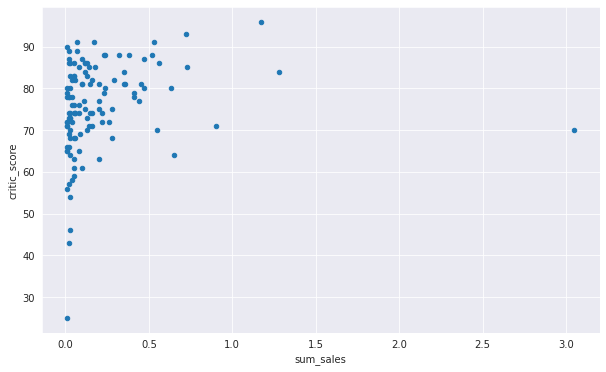

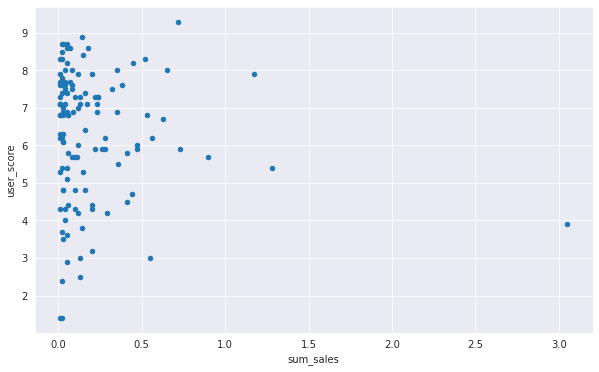

In [70]:
pc.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(10,6))
plt.show()
pc.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(10,6))
plt.show()

In [71]:
psv = data_actual[data_actual['platform']=='PSV']
print('Корреляция продаж с оценками критиков для PSV равна', psv['critic_score'].corr(psv['sum_sales']))
print('Корреляция продаж с оценками пользователей для PSV равна', psv['user_score'].corr(psv['sum_sales']))

Корреляция продаж с оценками критиков для PSV равна 0.16355533316764403
Корреляция продаж с оценками пользователей для PSV равна -0.1033232924108675


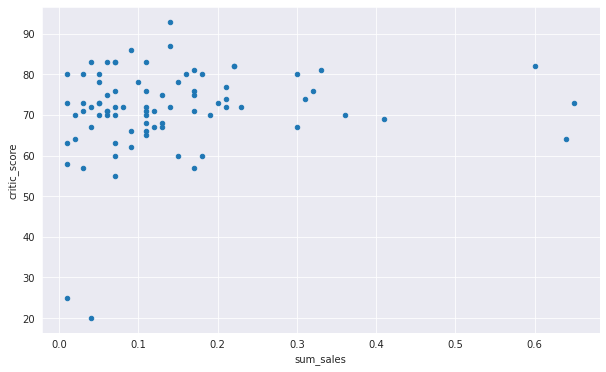

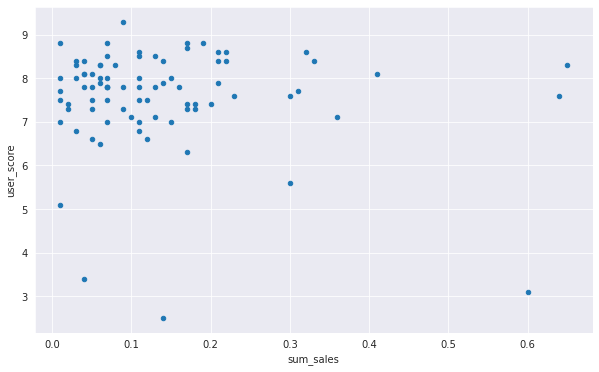

In [72]:
psv.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(10,6))
plt.show()
psv.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(10,6))
plt.show()

Выпишем полученные коэффициенты корреляции:

In [73]:
corr_table_data = {'Платформа' : ['PS4','XOne','3DS','PS3','X360','WiiU','PC','PSV'], 'Корреляция с оценками критиков' : [0.385, 0.370, 0.273, 0.320, 0.328, 0.361, 0.176, 0.164], 'Корреляция с оценками пользователей': [-0.029, -0.101, 0.233, -0.168, -0.141, 0.379, 0.076, 0.103]}
corr_table = pd.DataFrame(corr_table_data)
corr_table

,Платформа,Корреляция с оценками критиков,Корреляция с оценками пользователей
0,PS4,0.385,-0.029
1,XOne,0.370,-0.101
2,3DS,0.273,0.233
3,PS3,0.320,-0.168
4,X360,0.328,-0.141
5,WiiU,0.361,0.379
6,PC,0.176,0.076
7,PSV,0.164,0.103


Как видно по вышеприведенной таблице мы имеем **очень слабую** корреляцию между оценками пользователей и суммарными продажами для всех платформ, кроме WiiU (коэффициент корреляции Пирсона равен 0,379, т.е. корреляция **слабая**). 

В то же время оценки критиков имеют немного большее влияние на суммарные продажи. Лучше всего коррелируют оценки критиков с суммарными продажами для консолей PS4 и XOne (коэффициенты корреляции 0.385 и 0.370 соответственно). Но все равно по значениям коэффициентов корреляции Пирсона мы можем сказать, что оценки критиков оказывают **слабое** влияние на общие продажи.

**3.5 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Составим сводную таблицу для оценки распределения прибыли по жанрам.

In [74]:
genre_pivot = data_actual.pivot_table(index='genre', values = 'sum_sales', aggfunc=['sum','median'])
genre_pivot.columns=['sum_sales', 'median_sales']
genre_pivot_median_sort=genre_pivot.sort_values(by='median_sales', ascending=False)
genre_pivot_median_sort

,sum_sales,median_sales
genre,,
Shooter,170.94,0.515
Sports,109.48,0.180
Platform,18.09,0.140
Fighting,28.22,0.125
Role-Playing,101.44,0.110
Simulation,13.13,0.100
Action,199.36,0.090
Misc,37.55,0.090
Racing,27.52,0.090


In [75]:
genre_pivot_sum_sort=genre_pivot.sort_values(by='sum_sales', ascending=False)
genre_pivot_sum_sort

,sum_sales,median_sales
genre,,
Action,199.36,0.090
Shooter,170.94,0.515
Sports,109.48,0.180
Role-Playing,101.44,0.110
Misc,37.55,0.090
Fighting,28.22,0.125
Racing,27.52,0.090
Platform,18.09,0.140
Adventure,17.55,0.030


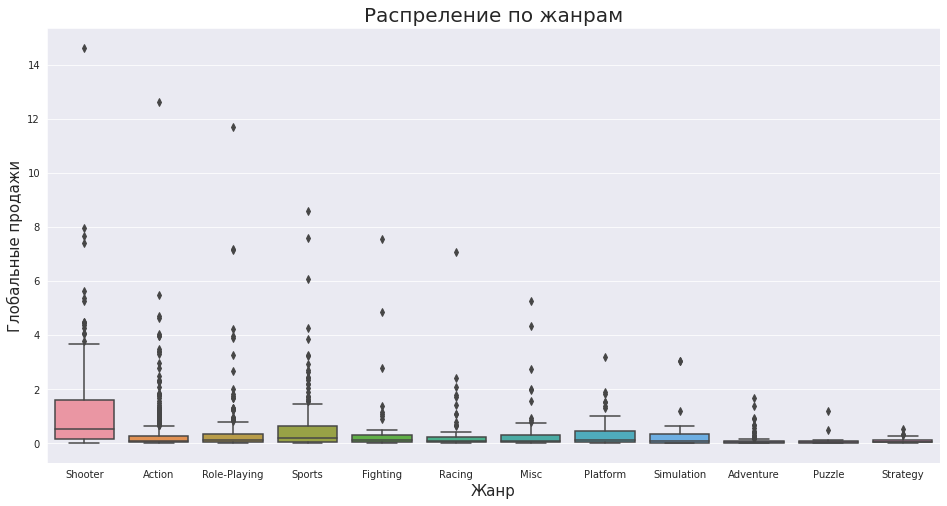

In [76]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data_actual, x='genre', y='sum_sales')
plt.title('Распреление по жанрам', fontsize=20)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15)
#plt.ylim(0,0.75)
plt.show()

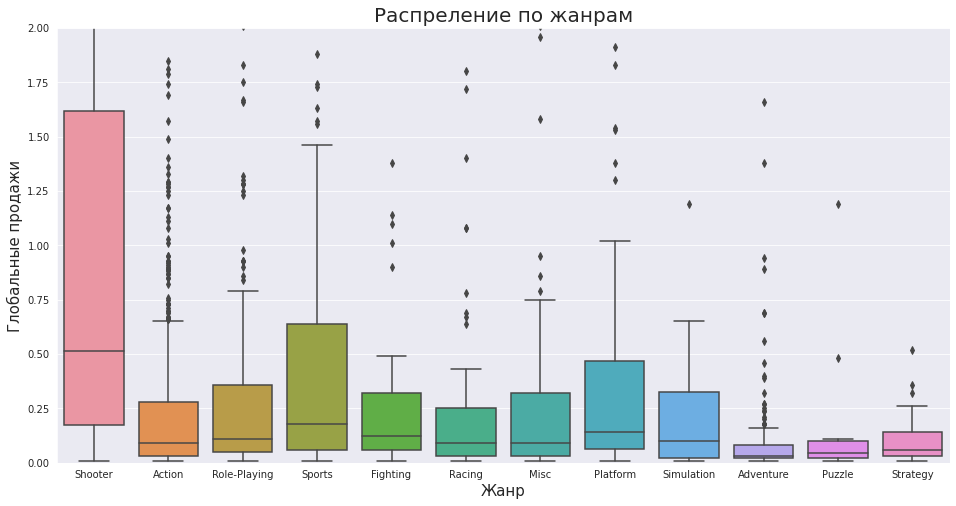

In [77]:
# Приведем в другом масштабе
plt.figure(figsize=(16,8))
sns.boxplot(data=data_actual, x='genre', y='sum_sales')
plt.title('Распреление по жанрам', fontsize=20)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15)
plt.ylim(0,2)
plt.show()

**Выводы по шагу 3.**

На данном этапе исследования были выяснено следующее:

* После 1995 года и до 2008 года был активный рост выпуска игр для различных платформ. Начиная с 2009 года и до 2012 года, количество выпускаемых игр только снижалось. После 2012 года выпуск игр для различных платформ стал более равномерным.
* Практически все платформы "живут" около 10 лет, после чего им на смену приходят новые. Пиковые значения по продажам, как правило, достигаются на 5 год существования платформы. На конец 2016 года самой прибыльной платформой стала PS4, поскольку она самая современная из представленных. 
* Наибольшие продажи в период  2014-2016 гг приходятся на PS4 и на XOne. 
* Суммарные продажи больше коррелируют с оценками критиков, чем с оценками пользователей. Однако корреляция все равно слабая.
* Самым прибыльным жанром является "Action". Хуже всего продаются игры в жанре "Strategy". Но если сравнивать медианные продажи, то лидером являются игры в шанре "Shooter".

**Шаг 4. Составьте портрет пользователя каждого региона.**

На этом шаге необходимо выяснить следующее:

* Какие платформы входят в топ-5 самых популярных для каждого региона?
* Какие жанры (топ-5) самые популярные для каждого региона?
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Расшифровка значений рейтинга ESRB:

* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет;
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет;
* «K-A»: Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес (в 1998 году был переименован в «E»)
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет;
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;
* «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Для составления портретов пользователей из каждого региона будем рассматривать данные за последние 2 года (2015 и 2016), поскольку для прогнозирования продаж на 2017 год мы не имеем полной информации за 2016 год. 

**4.1 Портрет пользователя из Северной Америки.**

Составим сначала сводные таблицы для всей истории наблюдений, а затем для последних двух лет.

In [78]:
data_pivot_platform_na = data[data['year_of_release']>=2014].pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
data_pivot_platform_na.head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [79]:
data_pivot_genre_na = data[data['year_of_release']>=2014].pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
data_pivot_genre_na.head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [80]:
data_pivot_rating_na = data[data['year_of_release']>=2014].pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
data_pivot_rating_na

,na_sales
rating,
M,96.42
no_rating,64.72
E,50.74
T,38.95
E10+,33.23


В последние 3 года топ-5 игровых платформ в Северной Америке выглядит так: PS4, XOne, X360, 3DS, PS3; причем PS4 и XOne гораздо популярнее остальных.

Что касается популярных жанров, то здесь топ-5 выглядит так: Shooter, Action, Sports, Role-Playing, Misc.

Если посмотреть на влияние рейтинга ESRB на продажи, то видно, что в последние 3 года популярнее всего игры для взрослых не младше 17 лет. 

**Также стоит обратить внимание, что игр без рейтинга достаточно много. Они расположились на втором месте.**

**4.2 Портрет пользователя из Европы.**

In [81]:
data_pivot_platform_eu = data[data['year_of_release']>=2014].pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
data_pivot_platform_eu.head()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [82]:
data_pivot_genre_eu = data[data['year_of_release']>=2014].pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
data_pivot_genre_eu.head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [83]:
data_pivot_rating_eu = data[data['year_of_release']>=2014].pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
data_pivot_rating_eu

,eu_sales
rating,
M,93.44
no_rating,58.95
E,58.06
T,34.07
E10+,26.16


Самыми популярными платформами у пользователей из Европы в последние 3 года стали PS4, XOne, PS3, PC, 3DS. Причем в Европе популярность PS4 почти в 3 раза выше, чем у XOne.

Что касается популярных жанров, то здесь топ-5 выглядит так: Action, Shooter, Sports, Role-Playing, Racing.

Здесь лидером по популярности стал жанр Action, в отличие от Северной Америки, где лидер Shooter. Также в отличие от Северной Америки в Европе пользуются популярностью гоночные симуляторы.

Если посмотреть на влияние рейтинга ESRB на продажи, то видно, что в последние 3 года популярнее всего игры для взрослых не младше 17 лет. То есть, для Европы влияние рейтинга на продажи за последние 3 года аналогично Северной Америке.

**В Европе игр без рейтинга тоже достаточно много. Они расположились также на втором месте.**

**4.3 Портрет пользователя из Японии.**

In [84]:
data_pivot_platform_jp = data[data['year_of_release']>=2015].pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
data_pivot_platform_jp.head()

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


In [85]:
data_pivot_genre_jp = data[data['year_of_release']>=2015].pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
data_pivot_genre_jp.head()

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


In [86]:
data_pivot_rating_jp = data[data['year_of_release']>=2015].pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
data_pivot_rating_jp

,jp_sales
rating,
no_rating,32.89
T,7.70
E,5.25
M,4.29
E10+,3.27


В последние 3 года топ-5 популярных платформ в Японии выглядит так: 3DS, PS4, PSV, PS3, WiiU. В Японии картина предпочтений игровых платформ заметно отличается от Европы и Северной Америки. Самой популярной платформой на текущий момент в Японии является 3DS, и ее популярность всего примерно в 2 раза превышает популярность PS4. XOne вообще не вошла в топ-5 по популярности.

Что касается популярных жанров, то здесь топ-5 выглядит так: последние 3 года:  Action, Role-Playing, Shooter, Misc, Adventure.
	
Предпочтения по жанрам у японских пользователей тоже заметно отличаются от североамериканцев и европейцев. В последние 3 года лидером по популярности являются игры в жанре Action, но при этом ролевые игры являются очень популярными (2 место). Также в топ-5 удалось попасть играм в жанре Adventure, что не наблюдалось в других регионах.

Если посмотреть на влияние рейтинга ESRB на продажи, то видно, что в последние 3 года (если не учитывать игры, которые не получили рейтинг) популярнее всего игры для подростков от 13 лет. То есть, для Японии влияние рейтинга на продажи игр также несколько отличается от Европы и Северной Америки.

Напоследок визуализируем полученные результаты по всем регионам.

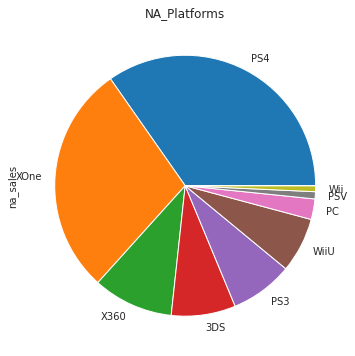

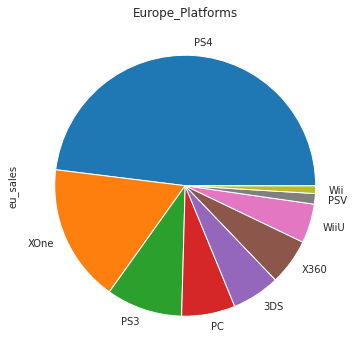

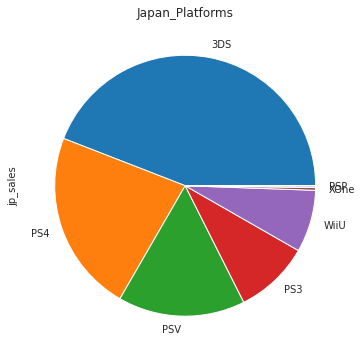

In [87]:
data_pivot_platform_na.plot(y='na_sales', kind='pie', figsize=(12,6), legend=False, title='NA_Platforms')
plt.show()
data_pivot_platform_eu.plot(y='eu_sales', kind='pie', figsize=(12,6), legend=False, title='Europe_Platforms')
plt.show()
data_pivot_platform_jp.plot(y='jp_sales', kind='pie', figsize=(12,6), legend=False, title='Japan_Platforms')
plt.show()

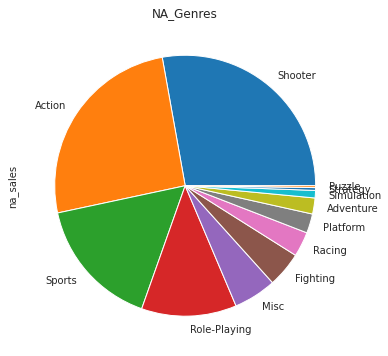

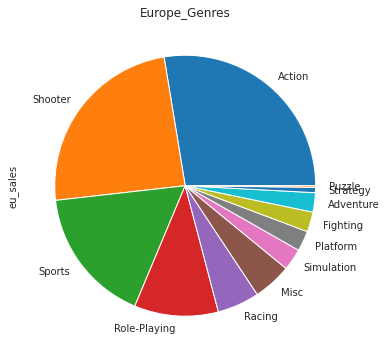

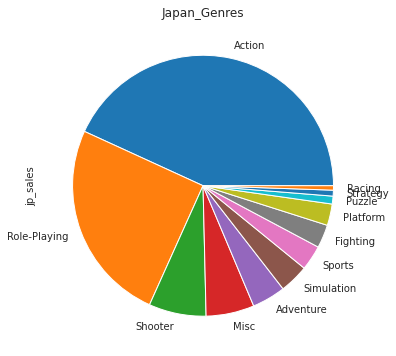

In [88]:
data_pivot_genre_na.plot(y='na_sales', kind='pie', figsize=(12,6), legend=False, title='NA_Genres')
plt.show()
data_pivot_genre_eu.plot(y='eu_sales', kind='pie', figsize=(12,6), legend=False, title='Europe_Genres')
plt.show()
data_pivot_genre_jp.plot(y='jp_sales', kind='pie', figsize=(12,6), legend=False, title='Japan_Genres')
plt.show()

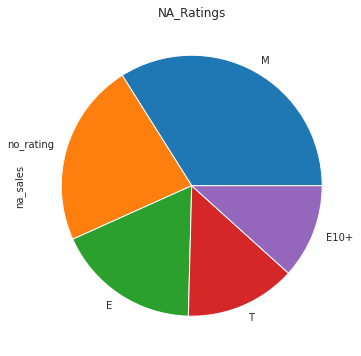

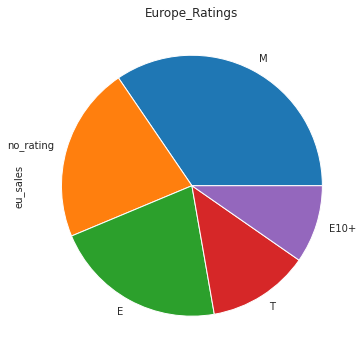

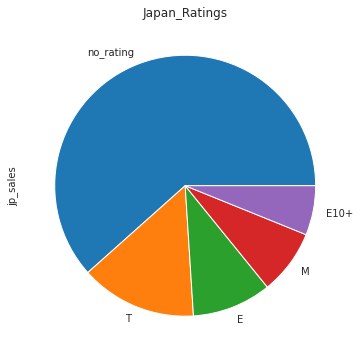

In [89]:
data_pivot_rating_na.plot(y='na_sales', kind='pie', figsize=(12,6), legend=False, title='NA_Ratings')
plt.show()
data_pivot_rating_eu.plot(y='eu_sales', kind='pie', figsize=(12,6), legend=False, title='Europe_Ratings')
plt.show()
data_pivot_rating_jp.plot(y='jp_sales', kind='pie', figsize=(12,6), legend=False, title='Japan_Ratings')
plt.show()

**Выводы по шагу 4.**

За последние 3 года (2014-2016 гг) ситуация следующая:

* в Северной Америке и Европе платформы PS4 и XOne пользуются очень большой популярностью, по сравнению с остальными платформами, но при этом в Японии PS4 всего лишь вторая популярности после 3DS (XOne даже не попала в Японии в топ-5);
* предпочтения по игровым жанрам для североамериканцев и европейцев практически похожи с небольшими отличиями, в то время как для японцев игры в жанре "Role-Playing" пользуются гораздо большим спросом, чем в Европе и Америке (шутеры всего лишь на третьем месте);
* в Северной Америке и Европе наибольшей популярностью пользуются игры для взрослых не младше 17 лет, а в Японии - для подростков от 13 лет (если не учитывать игры без рейтинга).

Основываясь на полученных результатах можно сделать вывод, что наиболее прибыльными в 2017 году могут стать игры в жанре  **Action** для платформы **PS4** с рейтингом **M** (от 17 и старше).

**Шаг 5. Проверьте гипотезы.**

Необходимо проверить следующие гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

**5.1 Гипотеза № 1**

* Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Для проверки гипотезы воспользуемся периодом с 2014 по 2016 год.

In [90]:
xone_2014_2016 = data[(data['platform']=='XOne') & (data['year_of_release']>=2014)]['user_score']
pc_2014_2016 = data[(data['platform']=='PC') & (data['year_of_release']>=2014)]['user_score']

In [91]:
print('Средний рейтинг для XBox One равен', xone_2014_2016.mean())
print('Средний рейтинг для PC равен', pc_2014_2016.mean())

Средний рейтинг для XBox One равен 6.70372340425532
Средний рейтинг для PC равен 6.317886178861788


In [92]:
#Выполним проверку гипотезы методом ttest_ind

alpha = .05

results = st.ttest_ind(xone_2014_2016.dropna(), pc_2014_2016.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.037042464858037645
Отвергаем нулевую гипотезу


P-value для нашего случая составляет примерно 3,7 %. Нулевая гипотеза может быть отвергнута.

Однако, если alpha сделать равным 1 % вместо 5 %, то результат ttest'а можно и не отвергать.

Можно также проверить нашу гипотезу и на весь промежуток времени с 1980 года.

In [93]:
xone_all = data[data['platform']=='XOne']['user_score']
pc_all = data[data['platform']=='PC']['user_score']

In [94]:
print('Средний рейтинг для XBox One равен', xone_all.mean())
print('Средний рейтинг для PC равен', pc_all.mean())

Средний рейтинг для XBox One равен 6.629756097560977
Средний рейтинг для PC равен 7.071483870967741


In [95]:
alpha = .05

results = st.ttest_ind(xone_all.dropna(), pc_all.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.680902481492337e-05
Отвергаем нулевую гипотезу


P-value для этого случая значительно меньше 5 % и даже 1 %, значит нулевая гипотеза отвергнута.

**5.2 Гипотеза № 2**

* Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports разные.
* Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Здесь также проверим нашу гипотезу на интервале 2014-2016 годов и с 1980 по 2016 год.

In [96]:
action_2014_2016 = data[(data['genre']=='Action') & (data['year_of_release']>=2014)]['user_score']
sports_2014_2016 = data[(data['genre']=='Sports') & (data['year_of_release']>=2014)]['user_score']

In [97]:
print('Средний рейтинг для игр в жанре Action равен', action_2014_2016.mean())
print('Средний рейтинг для игр в жанре Sports равен', sports_2014_2016.mean())

Средний рейтинг для игр в жанре Action равен 6.826376811594204
Средний рейтинг для игр в жанре Sports равен 5.262676056338028


In [98]:
#Выполним проверку гипотезы методом ttest_ind

alpha = .05

results = st.ttest_ind(action_2014_2016.dropna(), sports_2014_2016.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.67519687130241e-17
Отвергаем нулевую гипотезу


Значение p-value гораздо меньше 5 %, поэтому нулевую гипотезу можно отвергнуть. 

Теперь проверим на всем временном интервале.

In [99]:
action_all = data[data['genre']=='Action']['user_score']
sports_all = data[data['genre']=='Sports']['user_score']

In [100]:
print('Средний рейтинг для игр в жанре Action равен', action_all.mean())
print('Средний рейтинг для игр в жанре Sports равен', sports_all.mean())

Средний рейтинг для игр в жанре Action равен 7.076499032882012
Средний рейтинг для игр в жанре Sports равен 6.996370656370656


In [101]:
alpha = .05

results = st.ttest_ind(action_all.dropna(), sports_all.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14122626514748537
Не получилось отвергнуть нулевую гипотезу


А в этом случае p-value составляет 14,1 %, поэтому нулевая гипотеза не может быть отвергнута.

**Вывод по шагу 5.**

После проверки гипотезы № 1 было выявлено следующее:

* на промежутке времени с 2014 по 2016 гг нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" может быть отвергнута при alpha = 5 %, и не может быть отвергнута при alpha = 1 %;
* на промежутке времени с 1980 по 2016 гг нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" может быть отвергнута

После проверки гипотезы № 2 было выявлено следующее:

* на промежутке времени с 2012 по 2016 гг нулевая гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" может быть отвергнута;
* на промежутке времени с 1980 по 2016 гг нулевая гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" не может быть отвергнута

**Шаг 6. Общий вывод.**

В ходе работы над проектом было выполнено следующее:

* на первом этапе был изучен датасет, чтобы можно было понять, что потребуется в дальнейшем при подготовке данных для анализа;
* далее была непосредственно проведена подготовка данных для исследования, в ходе которой были поправлены названия столбцов, преобразованы типы данных в двух столбцах, обработаны пропуски и добавлен столбец с информацией о суммарных продажах;
* в ходе исследовательского анализа выяснились следующие детали:
    - после 1995 года и до 2008 года был активный рост выпуска игр для различных платформ. Начиная с 2009 года и до 2012 года, количество выпускаемых игр только снижалось. После 2012 года выпуск игр для различных платформ стал более равномерным;
    - средний "срок жизни" платформ - 10 лет;
    - пиковые продажи для каждой платформы с среднем достигаются на 5 годе существования платформы;
    - на конец 2016 года PS4 является самой прибыльной платформой;
    - за 2014-2016 гг наибольшие продажи приходятся на **PS4** и **XOne**;
    - суммарные продажи сильнее коррелируют с оценками критиков, чем с оценками пользователей (однако корреляция все равно слабая);
    - самым прибыльным жанром является "Action", а хуже всего продаются игры в жанре "Strategy", но если смотреть на медианные значения продаж, что на первом месте с большим отрывом игры в жанре "Shooter".
* в результате составления портрета пользователей из Северной Америки, Европы и Японии выяснилось, что предпочтения европейцев и североамериканцев достаточно близки (отличия есть, но они незначительные). Японцы, в свою очередь, заметно отличаются от двух других категорий пользователей, как в предпочтениях игровых платформ, так и в жанрах игр.

**На основе полученных результатов сделан вывод, что наиболее прибыльными в 2017 году могут стать игры в жанре Action для платформы PS4 с рейтингом M (от 17 и старше).**

* На последнем этапе исследования были проверены 2 гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.
 
  В первом случае гипотеза опровергается, если исследовать весь промежуток времени с 1980 по 2016 гг, и может отвергаться, если мы берем только интервал с 2014 по 2016 гг с alpha = 5% (с alpha = 1% гипотеза может не отвергаться).
  Во втором случае гипотеза не опровергается, если исследовать весь промежуток времени с 1980 по 2016 гг, но может отвергаться, если мы берем только интервал с 2014 по 2016 гг.